Расчет молекулярной массы пектина косвенным методом по определению вязкости растворов с помощью вискозиметра Уббелоде 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.DataFrame(
    {
        'C': [0.1, 0.2, 0.3, 0.4, 0.5],
        'T1': [51.77, 69.51, 87.69, 107.16, 139.79],
        'T2': [51.72, 69.63, 87.30, 106.68, 137.96]
    }
)

data

,C,T1,T2
0,0.1,51.77,51.72
1,0.2,69.51,69.63
2,0.3,87.69,87.30
3,0.4,107.16,106.68
4,0.5,139.79,137.96


In [3]:
T_H2O = sum([31.81, 31.89])/2
data['T'] = data[['T1', 'T2']].mean(axis=1)
data = data.drop(['T1', 'T2'], axis=1)

data['n_уд'] = (data['T']-T_H2O)/T_H2O

data['n_прив'] = data['n_уд']/data['C']

data['n_отн'] = data['T']/T_H2O

data['ln(n_отн)/C'] = np.log(data['n_отн'])/data['C']

data = data.round(2)

data

,C,T,n_уд,n_прив,n_отн,ln(n_отн)/C
0,0.1,51.74,0.62,6.25,1.62,4.85
1,0.2,69.57,1.18,5.92,2.18,3.91
2,0.3,87.50,1.75,5.82,2.75,3.37
3,0.4,106.92,2.36,5.89,3.36,3.03
4,0.5,138.88,3.36,6.72,4.36,2.95


Характеристическая вязкость = 5.85
R2 = 0.148


Text(-0.07, 5.88, '[n]=5.85')

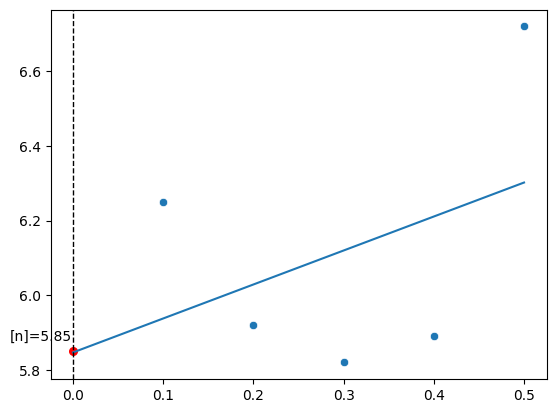

In [4]:
# from sklearn.preprocessing import PolynomialFeatures

X = data['C'].to_numpy().reshape(-1, 1)
y = data['n_прив'].to_numpy().reshape(-1, 1)

# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X=X, y=y)
y_pred = model.predict(X)

X_line = np.linspace(0, 0.5, 10).reshape(-1, 1)
y_pred_line = model.predict(X_line)

n = model.intercept_[0].round(2)
print(f'Характеристическая вязкость = {n}')
print(f'R2 = {r2_score(y, y_pred):.3f}')

# X_line = np.linspace(0, 0.5, 100).reshape(-1, 1)
# X_line_poly = poly.fit_transform(X_line)
# y_pred_line = model.predict(X_line_poly)

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X_line.ravel(), y=y_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n, color='red', s=30)
plt.text(-0.07, n + 0.03, f'[n]={n}', fontsize=10, color='black')

Характеристическая вязкость = 5.03
R2 = 0.892


(2.5, 5.5)

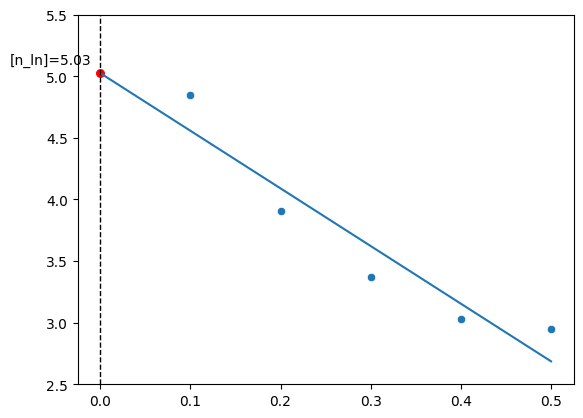

In [5]:
X = data['C'].to_numpy().reshape(-1, 1)
y_ln = data['ln(n_отн)/C'].to_numpy().reshape(-1, 1)

model = LinearRegression()
model.fit(X=X, y=y_ln)
y_ln_pred = model.predict(X)
X_ln_line = np.linspace(0, 0.5, 10).reshape(-1, 1)
y_ln_pred_line = model.predict(X_ln_line)

n_ln = model.intercept_[0].round(2)
print(f'Характеристическая вязкость = {n_ln}')
print(f'R2 = {r2_score(y_ln, y_ln_pred):.3f}')

sns.scatterplot(x=X.ravel(), y=y_ln.ravel())
sns.lineplot(x=X_ln_line.ravel(), y=y_ln_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n_ln, color='red', s=30)
plt.text(-0.1, n_ln + 0.07, f'[n_ln]={n_ln}', fontsize=10, color='black')
plt.ylim(2.5, 5.5)

[n] = 5.85 | Молекулярная масса = 49.35 кДа
[n_ln] = 5.03 | Молекулярная масса (ln) = 43.60 кДа

Таблица с данными:
     C       T  n_уд  n_прив  n_отн  ln(n_отн)/C
0  0.1   51.74  0.62    6.25   1.62         4.85
1  0.2   69.57  1.18    5.92   2.18         3.91
2  0.3   87.50  1.75    5.82   2.75         3.37
3  0.4  106.92  2.36    5.89   3.36         3.03
4  0.5  138.88  3.36    6.72   4.36         2.95


Text(-0.1, 5.1000000000000005, '[n_ln]=5.03')

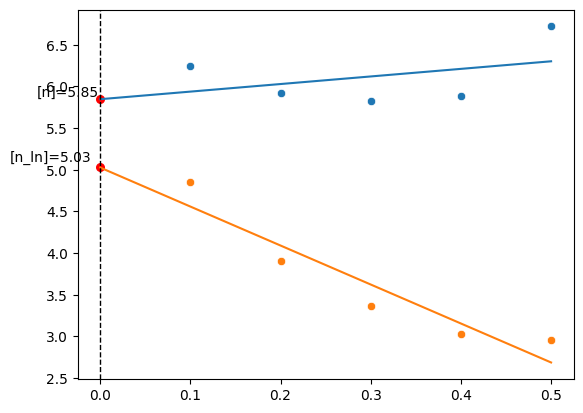

In [6]:
K = 1.1*10**(-5)
a = 1.22

MM = (n/K)**(1/1.22)/1000
print(f'[n] = {n} | Молекулярная масса = {MM:.2f} кДа')

MM_ln = (n_ln/K)**(1/1.22)/1000
print(f'[n_ln] = {n_ln} | Молекулярная масса (ln) = {MM_ln:.2f} кДа')

print(f'\nТаблица с данными:\n{data}')

sns.scatterplot(x=X.ravel(), y=y.ravel())
sns.lineplot(x=X_line.ravel(), y=y_pred_line.ravel())
sns.scatterplot(x=X.ravel(), y=y_ln.ravel())
sns.lineplot(x=X_ln_line.ravel(), y=y_ln_pred_line.ravel())

plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.scatter(0, n, color='red', s=30)
plt.scatter(0, n_ln, color='red', s=30)
plt.text(-0.07, n + 0.03, f'[n]={n:.2f}', fontsize=10, color='black')
plt.text(-0.1, n_ln + 0.07, f'[n_ln]={n_ln:.2f}', fontsize=10, color='black')